In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
path="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data= pd.read_csv(path)

In [3]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data['Year']= data['Date'].dt.year

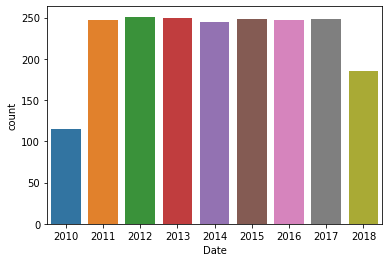

In [6]:
import seaborn as sns
sns.countplot(x = data['Date'].dt.year,data = data)

In [7]:
df=pd.DataFrame()
df['Total']=data.groupby('Year').sum().sort_values(by='Year')['Turnover (Lacs)']
df['Year']=data['Year'].sort_values(ascending=True).unique()
df

,Total,Year
Year,,
2010,173424.35,2010
2011,304230.86,2011
2012,839304.24,2012
2013,906908.50,2013
2014,1018418.44,2014
2015,575115.45,2015
2016,599627.49,2016
2017,1871250.47,2017
2018,1648180.65,2018


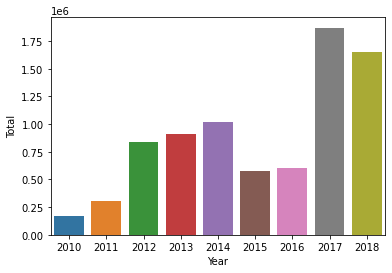

In [8]:
sns.barplot(x='Year',y='Total',data=df)

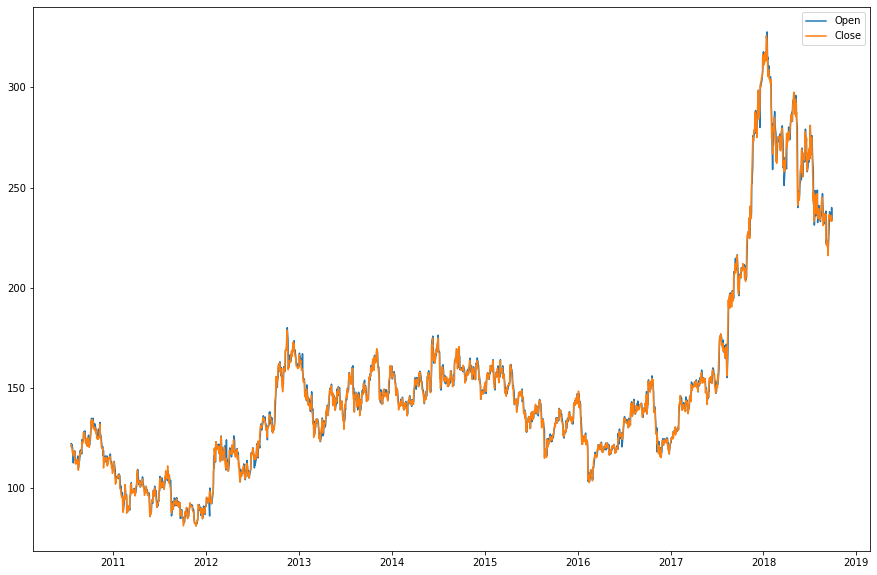

In [9]:
plt.figure(figsize=(15,10))
plt.plot(data['Date'],data['Open'], label='Open')
plt.plot(data['Date'],data['Close'], label='Close')
plt.legend()

In [10]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018
...,...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,2010
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,2010
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,2010
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17,2010


In [11]:
train=data.iloc[:1628,1:3].values
test=data.iloc[1628:,1:3].values
train.shape

(1628, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train)
test_scaled=sc.fit_transform(test)

In [15]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for i in range(60,1628):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
for i in range(60,407):
  x_test.append(test_scaled[i-60:i,0])
  y_test.append(test_scaled[i,0])
x_train,y_train= np.array(x_train), np.array(y_train)
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_train.shape)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

(1568, 60)


In [19]:
x_train.shape

(1568, 60, 1)

In [20]:
y_train.shape

(1568,)

In [21]:
x_test.shape

(347, 60, 1)

In [22]:
y_test.shape

(347,)

In [34]:
from tensorflow import keras
from keras import Sequential
from keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM


In [38]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(Dense(1))


In [40]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 32, verbose = 1)

Epoch 1/5
49/49 [==============================] - 9s 190ms/step - loss: 0.0085 - val_loss: 0.0433
Epoch 2/5
49/49 [==============================] - 9s 190ms/step - loss: 0.0085 - val_loss: 0.0475
Epoch 3/5
49/49 [==============================] - 9s 190ms/step - loss: 0.0079 - val_loss: 0.0398
Epoch 4/5
49/49 [==============================] - 9s 191ms/step - loss: 0.0075 - val_loss: 0.0402
Epoch 5/5
49/49 [==============================] - 9s 192ms/step - loss: 0.0069 - val_loss: 0.0406


In [43]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [72]:
import keras.backend as k 
def soft_acc(y_test,y_pred):
   return k.mean(k.equal(k.round(y_test),k.round(y_pred)))
   
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[soft_acc])    

In [66]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=()):
    if(logs.get('loss')<0.0050):
      print("model reached maximum accuracy with less loss!")
      self.model.stop.training=True

In [70]:
callbacks2=myCallback()

In [71]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,callbacks=[callbacks2],validation_data=(x_test,y_test))

Epoch 1/5
49/49 [==============================] - 17s 212ms/step - loss: 0.0056 - soft_acc: 0.9770 - val_loss: 0.0392 - val_soft_acc: 0.8684
Epoch 2/5
49/49 [==============================] - 9s 189ms/step - loss: 0.0053 - soft_acc: 0.9791 - val_loss: 0.0376 - val_soft_acc: 0.8688
Epoch 3/5
49/49 [==============================] - 9s 186ms/step - loss: 0.0050 - soft_acc: 0.9793 - val_loss: 0.0361 - val_soft_acc: 0.8715
Epoch 4/5
49/49 [==============================] - 9s 186ms/step - loss: 0.0055 - soft_acc: 0.9778 - val_loss: 0.0387 - val_soft_acc: 0.8754
Epoch 5/5
49/49 [==============================] - 9s 186ms/step - loss: 0.0053 - soft_acc: 0.9799 - val_loss: 0.0375 - val_soft_acc: 0.8743


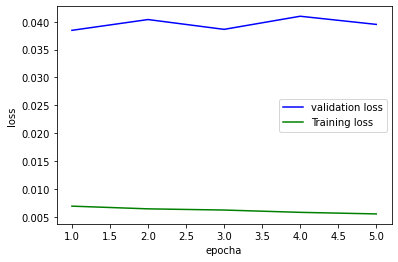

In [68]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,6)
plt.plot(epochs,loss_val,'b',label='validation loss')
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.xlabel('epocha')
plt.ylabel('loss')
plt.legend()
plt.show()

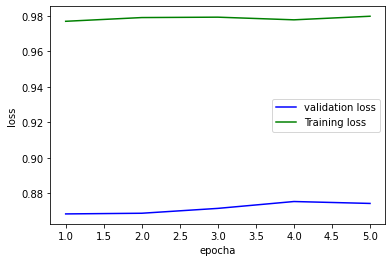

In [73]:
acc_train=history.history['soft_acc']
acc_val=history.history['val_soft_acc']
epochs=range(1,6)
plt.plot(epochs,acc_val,'b',label='validation loss')
plt.plot(epochs,acc_train,'g',label='Training loss')
plt.xlabel('epocha')
plt.ylabel('loss')
plt.legend()
plt.show()